v3
#### Changelog:

The dataset is roughlty the same but the input image is slighly bigger (128 -> 192)

New Dataset

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import h5py
import tensorflow as tf
import tensorflow.keras as K
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from nn_utils import *

# Check backend
print("Keras Backend: {}".format(K.backend.backend()))

Keras Backend: tensorflow


In [2]:
# Get dataset
train_input,train_label,test_input,test_label = load_dataset(path="dataset/snake_dataset_v3.hdf5")

print("Images train:", train_input.shape)
print("Labels train:", train_label.shape)
print("Images test:", test_input.shape)
print("Labels test:", test_label.shape)

classes = ["copperhead","cottonmouth","watersnake"]

Images train: (1215, 192, 192, 3)
Labels train: (1215,)
Images test: (134, 192, 192, 3)
Labels test: (134,)


In [3]:
# Shape of a image
train_input[0,:,:,:].shape

(192, 192, 3)

In [4]:
# Transform the label on vector label

Y_train = convert_to_one_hot(train_label,3)
Y_test = convert_to_one_hot(test_label,3)

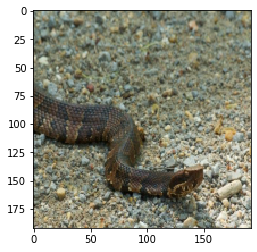

In [5]:
plt.imshow(train_input[0,:,:,:])

230
Classe: copperhead


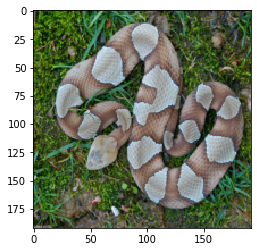

In [6]:
# Print a random Image from the train set
idx = np.random.randint(0,train_input.shape[0])
print(idx)
plt.imshow(train_input[idx,:,:,:])
print("Classe: {}".format(classes[np.where(Y_train[:,idx]==1)[0][0]]))

In [7]:
# Reshape Data for FC NN

# Normalize
X_train = train_input/255
X_test = test_input/255
# Reshape
# X_train = X_train.reshape(X_train.shape[0],-1).T
# X_test = X_test.reshape(X_test.shape[0],-1).T

print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)



(1215, 192, 192, 3)
(3, 1215)
(134, 192, 192, 3)
(3, 134)


## ARCHITECTURE of the NN

In [33]:
# simple testing NN
model = Sequential([
    layers.Flatten(input_shape=(192, 192,3)),
    layers.Dense(64,activation=tf.nn.relu),
    layers.Dense(32,activation=tf.nn.relu),
    layers.Dense(32,activation=tf.nn.relu),
    layers.Dense(64,activation=tf.nn.relu),
    layers.Dense(3,activation=tf.nn.softmax)]
)


In [34]:
adam = K.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy',"mse"])

In [35]:
history = model.fit(X_train, Y_train.T, epochs=50,batch_size=5)

Train on 1215 samples
Epoch 1/50
1215/1215 [==============================] - 1s 824us/sample - loss: 1.1141 - accuracy: 0.3350 - mse: 0.2254
Epoch 2/50
1215/1215 [==============================] - 1s 586us/sample - loss: 1.0855 - accuracy: 0.4041 - mse: 0.2191
Epoch 3/50
1215/1215 [==============================] - 1s 594us/sample - loss: 1.0603 - accuracy: 0.4453 - mse: 0.2132
Epoch 4/50
1215/1215 [==============================] - 1s 568us/sample - loss: 1.0501 - accuracy: 0.4551 - mse: 0.2108
Epoch 5/50
1215/1215 [==============================] - 1s 591us/sample - loss: 1.0181 - accuracy: 0.4782 - mse: 0.2037
Epoch 6/50
1215/1215 [==============================] - 1s 593us/sample - loss: 1.0051 - accuracy: 0.4741 - mse: 0.2007
Epoch 7/50
1215/1215 [==============================] - 1s 594us/sample - loss: 0.9905 - accuracy: 0.4691 - mse: 0.1982
Epoch 8/50
1215/1215 [==============================] - 1s 589us/sample - loss: 0.9848 - accuracy: 0.4930 - mse: 0.1967
Epoch 9/50
1215/12

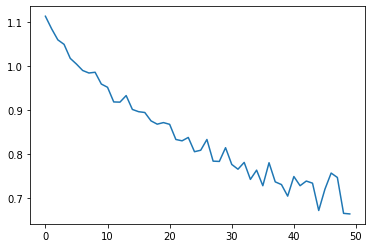

In [36]:
plt.plot(history.history['loss'])

In [37]:
test_loss, test_acc, test_mse = model.evaluate(X_test, Y_test.T)

print('Test accuracy:', test_acc)
print('Test MSE:', test_mse)

134/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Max performances:

Test accuracy: 0.60465115

Test MSE: 0.22472826


In [38]:
predictions = model.predict(X_test)

Predicted Classe: copperhead
Confidence: 95.19%
Correct classe: copperhead


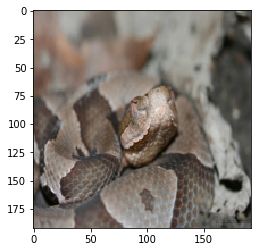

In [40]:
idx = np.random.randint(0,test_input.shape[0])
plt.imshow(test_input[idx])
print("Predicted Classe: {}".format(classes[np.argmax(predictions[idx,:])]))
print("Confidence: {0:.2f}%".format(100*predictions[idx,:].max()))
print("Correct classe: {}".format(classes[np.where(Y_test[:,idx]==1)[0][0]]))

In [43]:
test_path = "dataset/test_data/"
directory = os.listdir(test_path)
i = 0
images_test = np.empty([len(directory),128,128,3],dtype='uint8')
images_classes = []
for filename in directory:
    img = Image.open(test_path+filename)
    images_classes.append(filename.split('.')[0].split("_")[0])
    img = Image.Image.resize(img,(128,128)).convert("RGB")
    images_test[i] = np.array(img)
    i+=1

ptest = model.predict(images_test)

f,axes = plt.subplots(5,4,figsize=(20,20))
for i in range(5):
    for j in range(4):
        image = images_test[i+4*j,:,:,:]
        text = "Predicted: "+classes[np.argmax(ptest[i+4*j,:])] + " True: " + images_classes[i+4*j]
        axes[i][j].set_title(text)
        axes[i][j].imshow(image)
        axes[i][j].axis("off")

NameError: name 'Image' is not defined

In [36]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 110592)            0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                7077952   
_________________________________________________________________
dense_11 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_12 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_13 (Dense)             (None, 64)                2112      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 3)                

In [25]:
134/9

10.307692307692308